# Decision Tree Classification

## Import libraries

In [61]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Import data

In [62]:
# Read dataset
df = pd.read_csv('Loans_Dataset.csv')
df.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


# Data Preprocessing

## Get required data

In [63]:
# Get required Data
df.drop(columns = ['house_number'], inplace=True)
df.head()

,initial_payment,last_payment,credit_score,sum,result
0,201,10018,250,13515,yes
1,205,10016,395,13660,yes
2,257,10129,109,13746,yes
3,246,10064,324,13771,yes
4,117,10115,496,13822,yes


## Describe Data

In [64]:
# Describe Data
df.describe()

,initial_payment,last_payment,credit_score,sum
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,17744.012948
std,115.844218,1442.134231,259.681745,9594.659715
min,100.000000,10005.000000,100.000000,13515.000000
25%,195.750000,11213.500000,302.750000,16081.250000
50%,290.000000,12467.000000,518.000000,17383.000000
75%,398.000000,13690.000000,755.000000,18608.250000
max,500.000000,14999.000000,997.000000,246789.000000


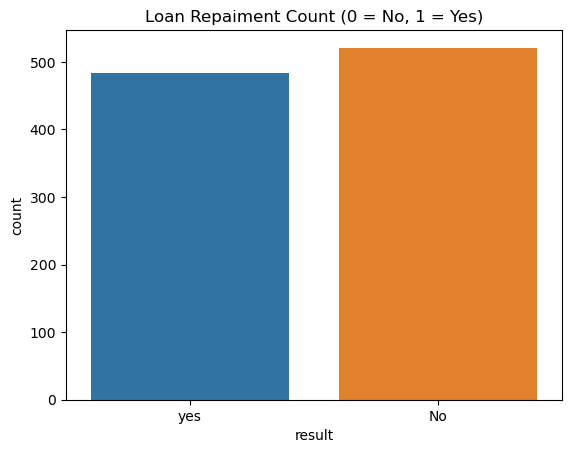

In [65]:
# Explore the data
sns.countplot(x='result', data=df)
plt.title("Loan Repaiment Count (0 = No, 1 = Yes)")
plt.show()

/tmp/ipykernel_446/2727176192.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['initial_payment'])


<Axes: xlabel='initial_payment', ylabel='Density'>

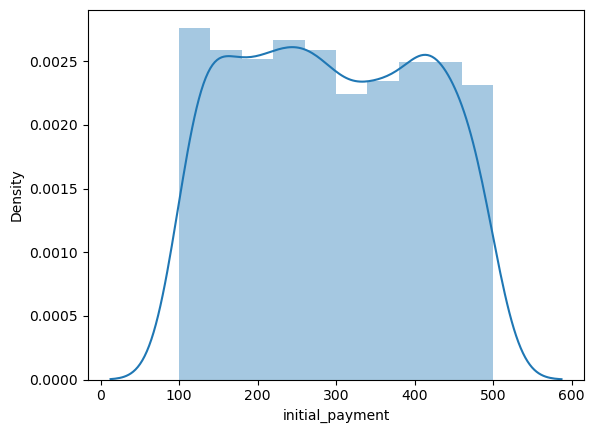

In [66]:
# Payment distribution
sns.distplot(df['initial_payment'])

## Label Encoding

In [67]:
# Encode 'result' column
le = LabelEncoder()
df['result'] = le.fit_transform(df['result'])   #'yes' is 1, 'no' is 0

## Correlation Matrix

In [68]:
# Correlation Matrix
df.corr()

,initial_payment,last_payment,credit_score,sum,result
initial_payment,1.000000,-0.013536,-0.009421,0.050698,-0.048464
last_payment,-0.013536,1.000000,-0.000805,0.213237,-0.805640
credit_score,-0.009421,-0.000805,1.000000,0.068387,-0.076326
sum,0.050698,0.213237,0.068387,1.000000,-0.092830
result,-0.048464,-0.805640,-0.076326,-0.092830,1.000000


<Axes: >

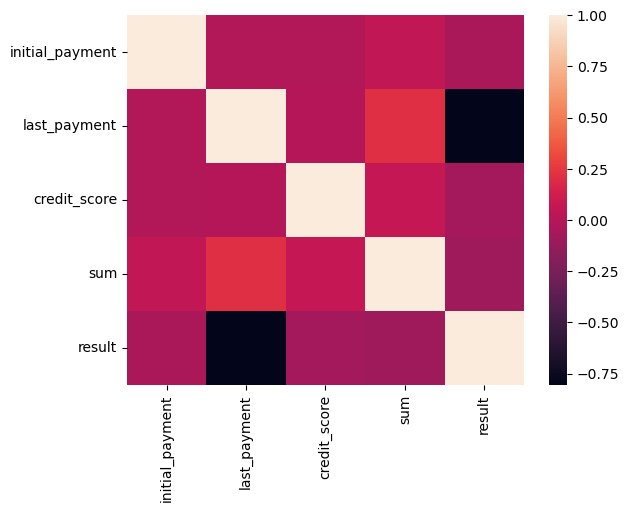

In [69]:
sns.heatmap(df.corr())

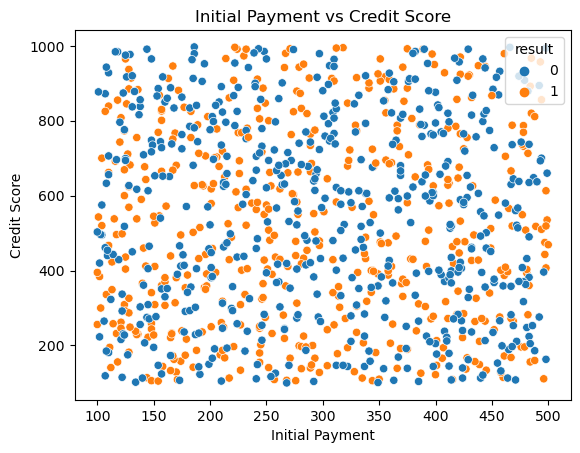

In [70]:
# Relationship between initial payment and credit score
sns.scatterplot(data=df, x='initial_payment', y='credit_score', hue='result')
plt.title('Initial Payment vs Credit Score')
plt.xlabel('Initial Payment')
plt.ylabel('Credit Score')
plt.show()

## Split Data

In [71]:
# Split Data into independent/dependent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Train/Test sets

In [72]:
# Split Data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feature scaling (normalizing)

In [73]:
# Scale Dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Train model

In [74]:
# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth=4, min_samples_leaf=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=100)

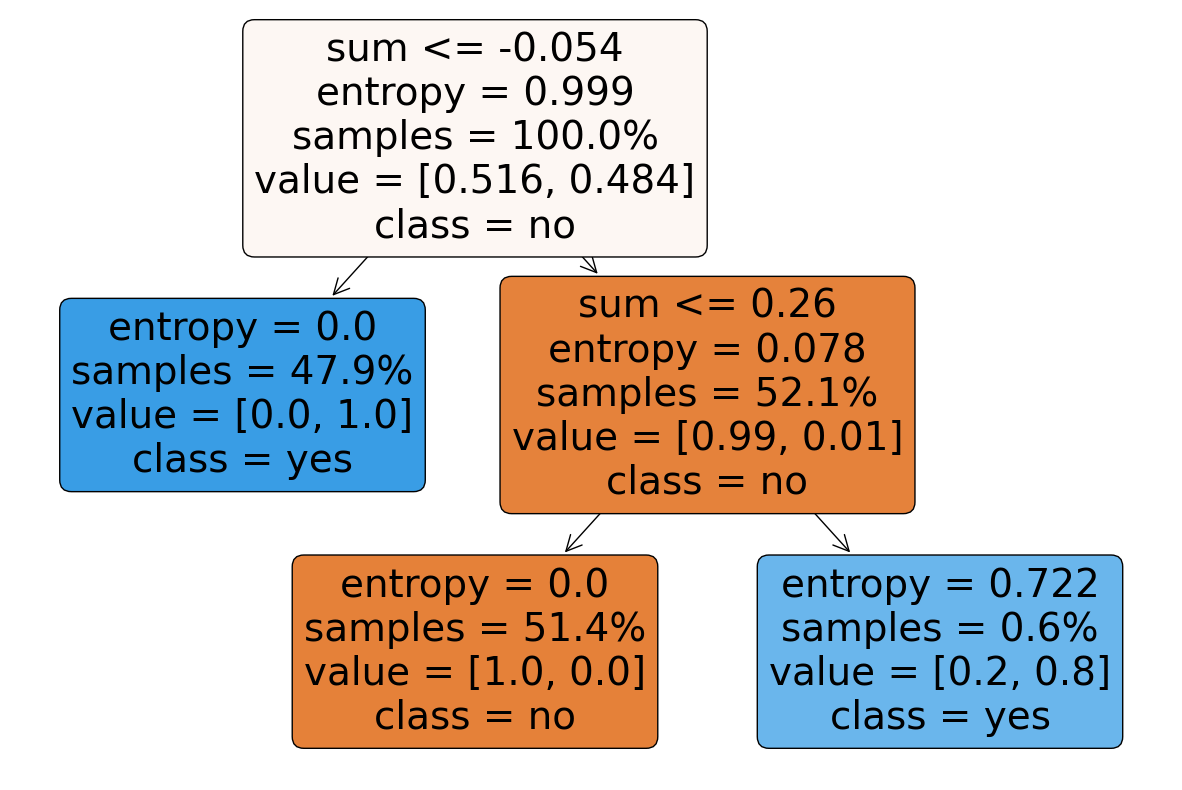

In [75]:
# Display tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,
               feature_names=['initial_payment', 'last_payment', 'credit_score', 'sum'],  
               class_names=['no', 'yes'],  # target labels
               proportion=True,
               filled=True,
               rounded=True)
plt.show()


## Predict result / Score model

In [76]:
# Predict result
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]

# Evaluate model

## Find Accuracy

In [77]:
# Find Accuracy
accuracy_score(y_test, y_pred)

0.9950248756218906

## Classification report

In [78]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       107
           1       0.99      1.00      0.99        94

    accuracy                           1.00       201
   macro avg       0.99      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



## F1 Score

In [79]:
# F1 Score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.9947089947089947


In [80]:
## Confusion Matrix

<Axes: >

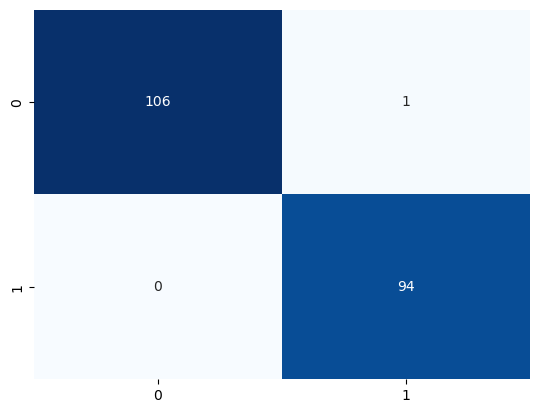

In [81]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)